In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython
import random
maxVelocity = 6.5
thetaStates = 50
thetaDotStates = 50
thetaStepSize = 2*math.pi/49
thetaDotStepSize = 2*maxVelocity/49



In [2]:
def pendulum(state,action):
    GRAVITY = 9.8
    LENGTH = 1.0
    dt1 = 0.001
    FORCE = 4.0
    time = 200
    if (action == 0):
        u = -FORCE
    elif(action == 1):
        u = FORCE
    elif(action == 2):
        u = 0
    
    theta, thetaDot = get_values(state)
    
    for i in range(time):
        
        newThetaDot = thetaDot + dt1*(-(GRAVITY/LENGTH)*np.sin(theta) + u)
        newTheta = theta + dt1*newThetaDot
        
        theta = ((newTheta + np.pi)%(2*np.pi)) - np.pi
        thetaDot = np.clip(newThetaDot, -maxVelocity, maxVelocity)
        
    next_state = get_state(newTheta, newThetaDot)
    return next_state
    

In [3]:
def get_state(theta, thetaDot):
     
    state = 0
    for i in range (thetaStates):
        for j in range (thetaDotStates):
            if ((theta >= (-np.pi + thetaStepSize*i)) & (thetaDot >=(-maxVelocity + thetaDotStepSize*j))):
                state = i*thetaStates + j    
    return state

def get_values(state):
    thetaDot = -maxVelocity + (state%thetaDotStates)*thetaDotStepSize
    theta = -np.pi + int(state/thetaStates)*thetaStepSize
    return theta, thetaDot





In [42]:
def draw_pendulum(theta_array):
    x1 = np.sin(theta_array)
    y1 = -np.cos(theta_array)

    x1= x1[:,0::200]
    y1= y1[:,0::200]

    fig = plt.figure()
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
    ax.grid()

    line, = ax.plot([], [], 'o-', lw=2)
    time_template = 'time = %.1fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    dt = 0.0005
    t = np.arange(0.0, 20, dt)

    def init():
        line.set_data([], [])
        time_text.set_text('')
        return line, time_text


    def animate(i):
        thisx = [0, x1[i]]
        thisy = [0, y1[i]]

        line.set_data(thisx, thisy)
        time_text.set_text(time_template % (i*dt))
        return line, time_text

    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(theta_array)),
                                  interval=200, blit=True, init_func=init)


    plt.close(fig)
    plt.close(ani._fig)
    IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))

#     plt.plot(range(10), states[:10,1])

#     plt.xlabel("time (ms)")
#     plt.ylabel("x")
#     plt.show()
    ani.save('qlearn_pendulum.mp4', fps=15)



In [43]:
# state transition table
next_states = np.zeros((thetaStates*thetaDotStates,3))
for i in range (thetaStates*thetaDotStates):
    for j in range(3):
        next_states[i,j] = pendulum(i,j)

In [44]:
# update Q-table
def update_qTable(currentState, currentAct):
    EPSILON = 0.25
    ALPHA = 0.8
    GAMMA = 0.85
    nextState = int(next_states[currentState,currentAct])
    if (EPSILON>(random.randint(1,10)*0.1)):
        nextAct = random.randint(0,2)
    else:
        nextAct = np.argmax(qTable[nextState,0:3])
    if((currentState == 24) | (currentState == 25) | (currentState == 2474) | (currentState == 2475)):
        reward = 0
#         print('goal state')
    else:
        reward = -1
    
    qTable[currentState,currentAct] = (1-ALPHA)*qTable[currentState,currentAct] + ALPHA*(reward + GAMMA*qTable[nextState,nextAct])
    return nextState, nextAct

In [50]:
def run_episode():
    currentState = 1224
    currentAct = 1
    episodeSteps = 500
    
    for i in range(episodeSteps):
        nextState, nextAct = update_qTable(currentState, currentAct)
        currentState, currentAct = nextState, nextAct
        
        

In [46]:
#Create Q-table
qTable = np.zeros((thetaStates*thetaDotStates,4))
for i in range (thetaStates*thetaDotStates):
    qTable[i,3] = i


In [47]:
for i in range(1000):
    
    run_episode()



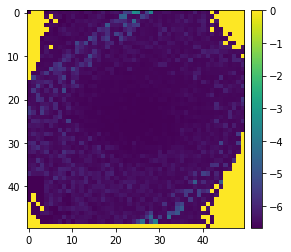

In [48]:
action0qVals = qTable[:,0].reshape(50,50)
action1qVals = qTable[:,1].reshape(50,50)
action2qVals = qTable[:,2].reshape(50,50)
valuefunction = np.maximum(action0qVals,action1qVals,action2qVals)

ax = plt.subplot(111)
im = ax.imshow(valuefunction)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)

### 

1171
1070
970
872
825
934
1190
1491
1787
1982
2022
1811
1401
905
564
367
218
123
71
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24
27
24


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA6aW1kYXQAAAKtBgX//6ncRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49NSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNo
PTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFw
bWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAFMNliIQA
E//+97GPgU3IAA2XOop6H+EVsfSQUXqx2aBk6gAAAwAAiYH639o/F/gA8+At88Vc9MiGQMJKImnl
T5plS/qcJnj5ElOpeY+cm8ST9iRrD+bshqar6GyYFf2lBfyR/K9H0TUhYsAAZ2noP1+A4CMFKsiJ
T26Qk7FazlmUmxlazb9dIozzoq3bYtK/c54ZTlHPzUSFqHDw8RykhDsfViqRdwnqG/Y2nhio9/id
PONNfS6Tx0xq/36jndk/T7Uqing8UkRufyZd30/1kRon83E1+0c7H3fYm9tOfQ/SiizTdS2jhl9x
LJcERxFORFWH+9QwQYH/DBQgaaYObtj+B5i+uBOcIKw71ZbfYIntRzRtEzUtb6zG6ovGMbwrQVUP
L83ilaDjkrbq3Df+EHEvKKRcaV7UmWZRgEU3cKKxJU6rx42msYw2VWFRSAQgYBwu5C0TXpmCJAki
Yi3VBwUJwctkNhcTDC3rHP3yldPlFGdt7ycFCEhUuaA918K8sqQnj1R7TXCDI2x2+Buy1OHWChFu
qJYSv5g4nfiiOkSYxm5sZdCaXxs/565KUXUM4n7I4TKf67qjI89y0QWbjrs2IxsuxwALaImJYjII
XTkTeo8nkySGZzD6wH3azArlzHWrl8eKdz4BbL/22ImZKVMfbRyiqIE9O2/3XltPtpMQtJAqGAAK
HB8/OPIaSCMTBsecKhO6RQ4DuBs8BUP8/DgvGwHBzRBmoULbbjZg+s8YtaCz7tUu3wvC/jnxrX+Q
fXAPETTcu8u1Hx1lIWPUdPFWQiQGqwfHvEaATkMqnmSmZ1v3A79FMnlkdZfK4NlwcpUR5fhq3Vjg
c9IuU3Gvc4nGMmUDxnPos1pcgP66FSPyxgd3RXokFrEuwVTUHvT+5hbDgPqjhk+CNyHuPtoaRQOy
aZ4F/o6ekH5ihkoUvy3dbgQ51bJqVWGfcyuh6C1GpBOVuT8OHoFVqoZmHd79XjHgg2XqWpCmJxGs
RqW/7YabNZZhfEJDmcFaRVhgSbiDXkp3oyc9iE9jPAU/eBWXeu2BO3jYL51hKJoQ4sHGC2dhXvvA
hIRPtVCHu68R/4mfmi/xTT6zOZMyJyHimCvaw5sK4flySkUFvQd18wnjqO2NhsKTSECcMJMn3goK
W3K8sw0feIEw3HSsWx4z///xhXBh84Yt+LrNJsHks6hNac31qSI/4gexYzpEV8fFFhHB//RK81uj
t4pNbOYATdmTKZfkp5A2bT/nkmayoPBweC4LOawEhWKu+BYtsOSWG+fCv2LHbiSE6/7gsr9LwkYU
0nMJOcCb+P8HCJ/OYvxaUO2Z+hPQETuviES8HwFNMIcOBOaeU1Q0IXud3zckk1vEZ06yFMKeOazQ
BXrDWdn+7ovwNnDDELRxbhg+fHWvmvU1jR6dHE3XCZeRPbn4jtUbhcAl0+NpDOv3/lBPDR4K3O8+
vdCYX4NNYg3atObJidHoMPHWPylHE+j/da+p3jv9r0+xyCBYznVgULL7SlULDQX4OufjQFB2xB1q
82suAYXc5p6UMSM5WD5zw132v7L1I5euJPaV+tln7i66Dj1Qq0fqGWJ/tn+w4ERSsDGKJjmtzU2v
qV/l9UjqPVvj7NR84pCFRqXr9CHCS5gOm5/8rORHtHv162YHRq0Wa25rUCGicFfunCX77Trn//qR
jovDsIjeepn9OHnAOdoKwJ9z8VB+iM7ndGTuMFgSvZ3wAHq3/r79PzkWA6cL6qotxVWS9lCQcZLu
7OGrPfeaJUAF0yPzRyK0SFcEpTLp8PQwPLVyn2NJG2l5wYCDiynjaMsemlyASOD1Lph+E6mSI2dO
IQH4qNYFLCeivHXpDhP9+vI2SmHOpjxH9u7N1H0EGX7SUSSLgYyoSDzhXPSDW7OFnHR2sqNYH/Ag
ZW6IVEWZ25Kr8rZ6dW19L68d+tbxiugjgH409y3dcd1fLVIhWMfHciXkTbYTWyc0j8rruiTI6ujq
e0z6YLQyz/2a3MoJ7VigCcjBc6zXV5QfI2yzmhnW4gEssh/EweIawqWWB5eUdhtgbger7+A4cA8h
//1gJvApr+epzahRyPiMF/GNIPVCCqqPr24tTbMiKtvgsKufB9c/5rhR26g+eA4etwjLXxC5WC7f
kSl+3GZK/iUku4LYZEiZbR+q9smyYSoSVbhUV//SKnHnumW7NduWKigxOP7QsmP+rQQ5vw7VvRB+
+8fTKZ/bjA9TTgX7bWoMIEcI+RhYx/y6HITcfnB27QWRfDahjQk/TgHHYYi28i7x4Eo/PeD3cHfN
0fK2o4ZLtBDLZDLsbUetHQeJUbFZ8He4aXuo+s1/74Ecagch7kdeE3JbnOx5W/sPkMaqWEeB6A0f
QJv/77WS/0P8wveCkkLKYMHbelvJpxFD0f2OhMGAUnbddllKi8UEBzvsznVC1DKxwNtcAzQeYbzU
QilsggpDzqszczgQ/K8KU5bf/jqSSwVyUlmNJjUqhv/9H3m1NUUYRug6p+00Kx2d745cLONMWBcZ
3qr9dzoUlqL/2hToV6oXjlGykORQZBODE486vQf1YOm4xS6tT0AKqqXBSHM7PtYr/VYLgLcT5nJH
rUdqTEcKp6IK92dLeZaifSZ5J3pWbUUX5SQmHKe7F2bI5Mf+FZMLCpY3oaDts/lmyXoSXb4mjsCl
U5mkIIivcAQ9KTioqGj+1FGlfjfmyiPFagycv2IqaifivbqXAP9okI3SQxYvSAP7s7lPlq5j/zNE
sJsblIFMA8dykdR5Aka711VfAc1SjX3oYNHmHOgWlMfMMBImIqxq1C1gZ/hb4dOstKkjijN6s+6X
Do2Z0f8AE3zVmpQImqP56f9An8HU/0/y7wNNB8BU+tccHfxslhl4eqIsEbccJp+r9z37amjTrPoT
BGTnm4mOJl7K7t8Ri54k5

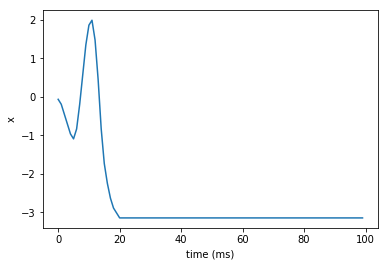

In [49]:
st = 1224
act = 2
num = 0
policy = np.zeros((100,2))
thetaVals = np.zeros((100,1))
valuefunction = np.zeros((100,1))
for i in range(100):
    nextact = np.argmax(qTable[st,0:3])
    nextst = int(next_states[st,nextact])
    thetaVals[i],num = get_values(st)
    st = nextst
    print(st)   
    
    
plt.plot(range(100), thetaVals)
draw_pendulum(thetaVals)
plt.xlabel("time (ms)")
plt.ylabel("x")
plt.show()


In [205]:
a,b = get_values(2201)
print(a,'\n',b)

2.500451295714325 
 -6.23469387755102
